In [1]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Dataset Overview

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

X.shape, y.shape

((70000, 784), (70000,))

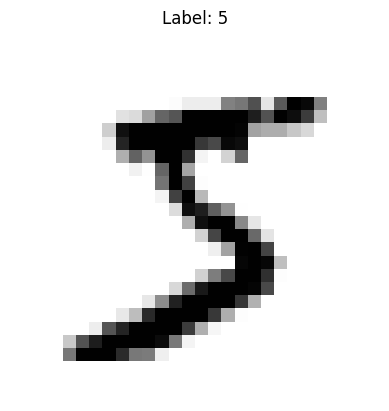

In [3]:
image = X.iloc[0].values.reshape(28, 28)

plt.imshow(image, cmap='gray_r')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

In [4]:
X.iloc[0], y[0]

(pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
 pixel5      0
            ..
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 pixel784    0
 Name: 0, Length: 784, dtype: int64,
 np.int64(5))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42, stratify=y)  # 1/7 * 70,000 = 10,000

print(f"Training Set: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Test Set: X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Training Set: X_train shape: (60000, 784), y_train shape: (60000,)
Test Set: X_test shape: (10000, 784), y_test shape: (10000,)


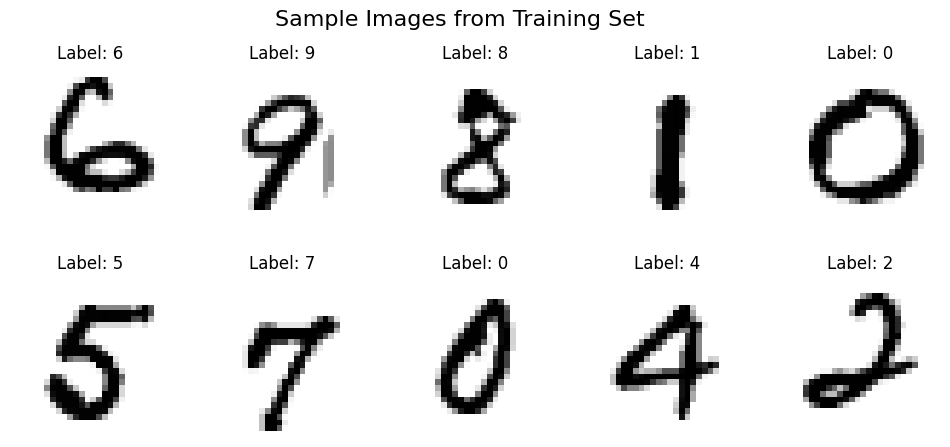

In [6]:
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = X_train.iloc[i].values.reshape(28, 28)  # Reshape 784 back to 28x28
    plt.imshow(image, cmap='gray_r')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Training Set", fontsize=16)
plt.show()

# Binary Classification

### Convert the dataset to a Binary Classification Problem

In [7]:
y_train_binary = (y_train == 5).astype(int)  # 1 if the digit is 5, otherwise 0
y_test_binary = (y_test == 5).astype(int)    # 1 if the digit is 5, otherwise 0

In [8]:
y_train_binary.value_counts()

class
0    54589
1     5411
Name: count, dtype: int64

### Training a Binary Classifier

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5, random_state=42)
log_reg.fit(X_train, y_train_binary)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Measure Accuracy


In [10]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train_binary, y_train_pred)
test_accuracy = accuracy_score(y_test_binary, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9271
Test Accuracy: 0.9291


# Performance Measures


In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc
import seaborn as sns

### Confusion Matrix


In [12]:
cm = confusion_matrix(y_test_binary, y_test_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[9014   84]
 [ 625  277]]


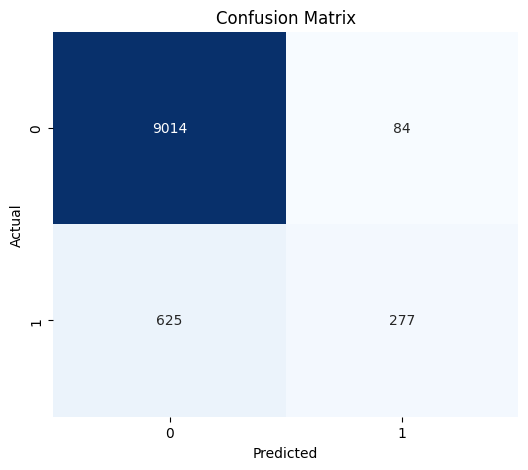

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### Precision, Recall, and F1 Score

In [14]:
precision = precision_score(y_test_binary, y_test_pred)
recall = recall_score(y_test_binary, y_test_pred)
f1 = f1_score(y_test_binary, y_test_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7673
Recall: 0.3071
F1 Score: 0.4386


### Precision/Recall Trade-off

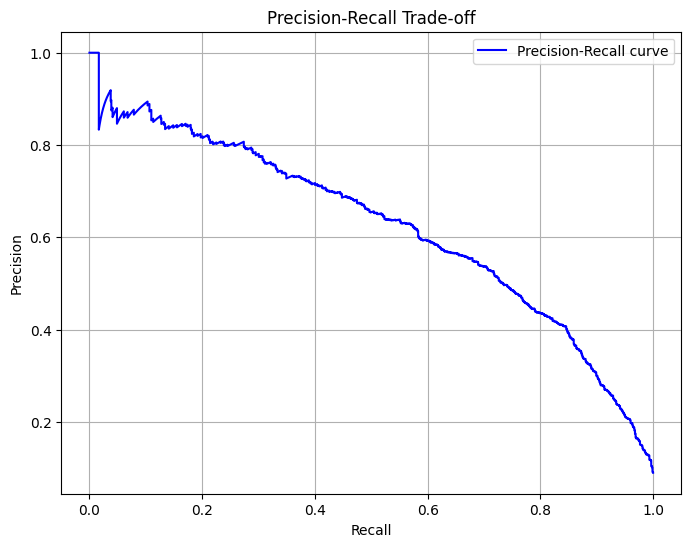

In [15]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test_binary, y_pred_prob)

# Plot Precision vs Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', label="Precision-Recall curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.grid(True)
plt.show()

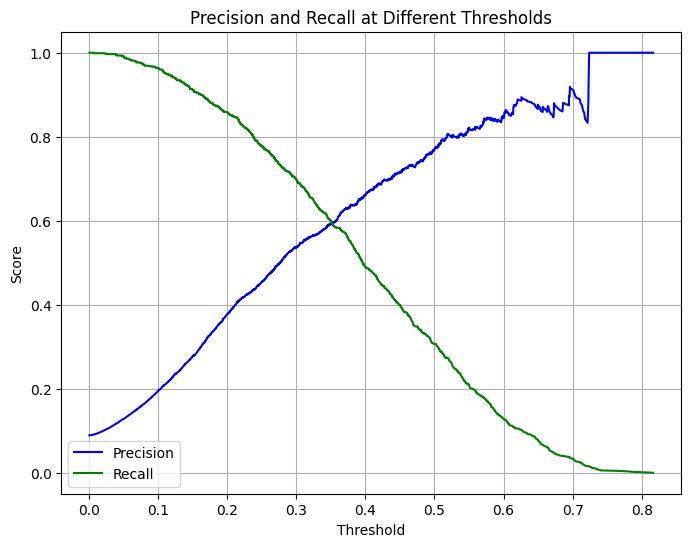

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_vals[:-1], label="Precision", color='blue')
plt.plot(thresholds, recall_vals[:-1], label="Recall", color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Show Precision and Recall values for different thresholds
threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# For each threshold, calculate Precision and Recall
for threshold in threshold_range:
    # Get predictions based on the threshold
    y_pred_binary = (y_pred_prob >= threshold).astype(int)
    
    # Calculate Precision and Recall
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    
    print(f"Threshold: {threshold:.1f} => Precision: {precision:.4f}, Recall: {recall:.4f}")

Threshold: 0.1 => Precision: 0.1948, Recall: 0.9634
Threshold: 0.2 => Precision: 0.3769, Recall: 0.8592
Threshold: 0.3 => Precision: 0.5375, Recall: 0.6984
Threshold: 0.4 => Precision: 0.6617, Recall: 0.4900
Threshold: 0.5 => Precision: 0.7673, Recall: 0.3071
Threshold: 0.6 => Precision: 0.8467, Recall: 0.1286
Threshold: 0.7 => Precision: 0.9118, Recall: 0.0344
Threshold: 0.8 => Precision: 1.0000, Recall: 0.0022
Threshold: 0.9 => Precision: 0.0000, Recall: 0.0000


c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### AUC-ROC Curve


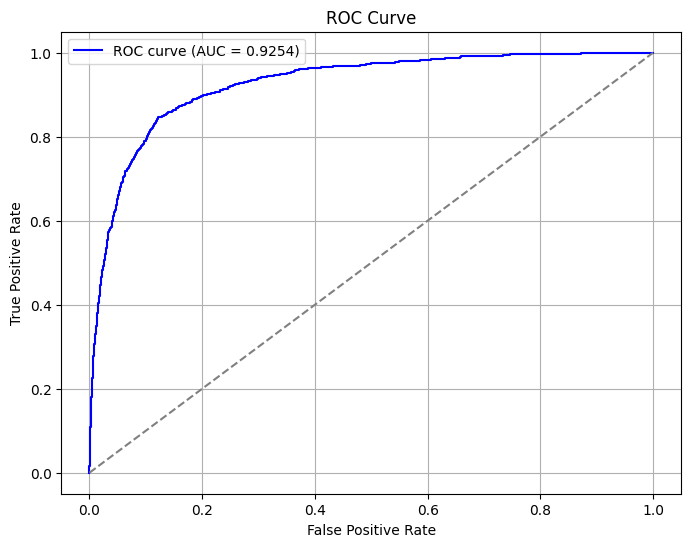

AUC (Area Under the Curve): 0.9254


In [18]:
fpr, tpr, roc_thresholds = roc_curve(y_test_binary, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Display the AUC value
print(f"AUC (Area Under the Curve): {roc_auc:.4f}")

c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


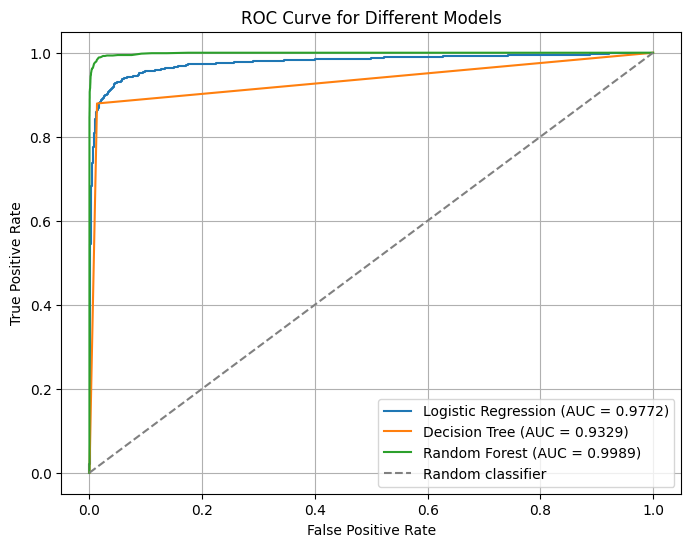

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Prepare the plot
plt.figure(figsize=(8, 6))

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_binary)
    
    # Get the predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line (Random classifier line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Multiclass Classification


In [20]:
from sklearn.svm import SVC
import numpy as np

In [21]:
svm_ovo = SVC(random_state=42)
svm_ovo.fit(X_train, y_train)

y_pred_ovo = svm_ovo.predict(X_test)
cm_ovo = confusion_matrix(y_test, y_pred_ovo)

In [22]:
log_reg_ova = LogisticRegression(max_iter=100, random_state=42)
log_reg_ova.fit(X_train, y_train)

y_pred_ova = log_reg_ova.predict(X_test)
cm_ova = confusion_matrix(y_test, y_pred_ova)

c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


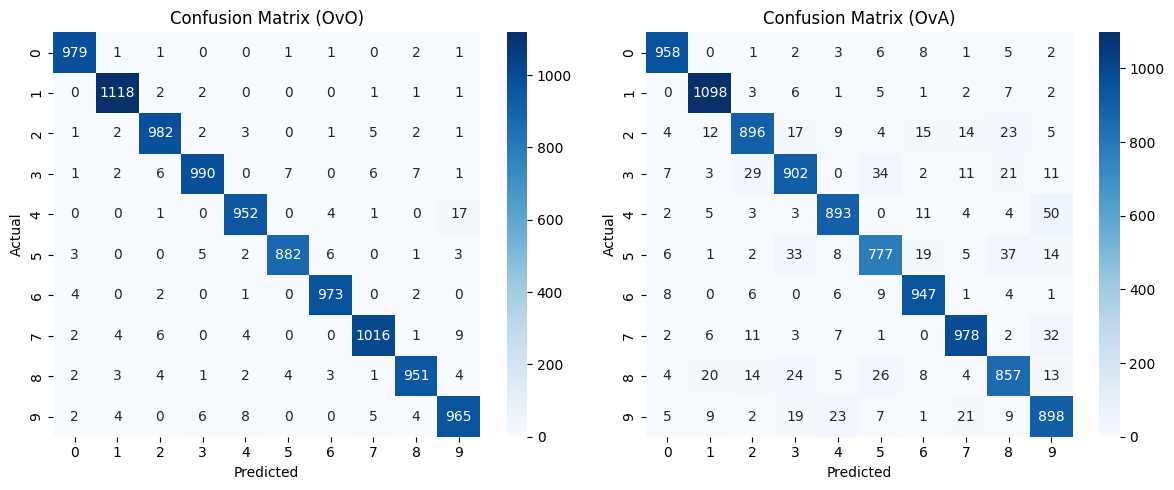

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_ovo, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (OvO)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_ova, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (OvA)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

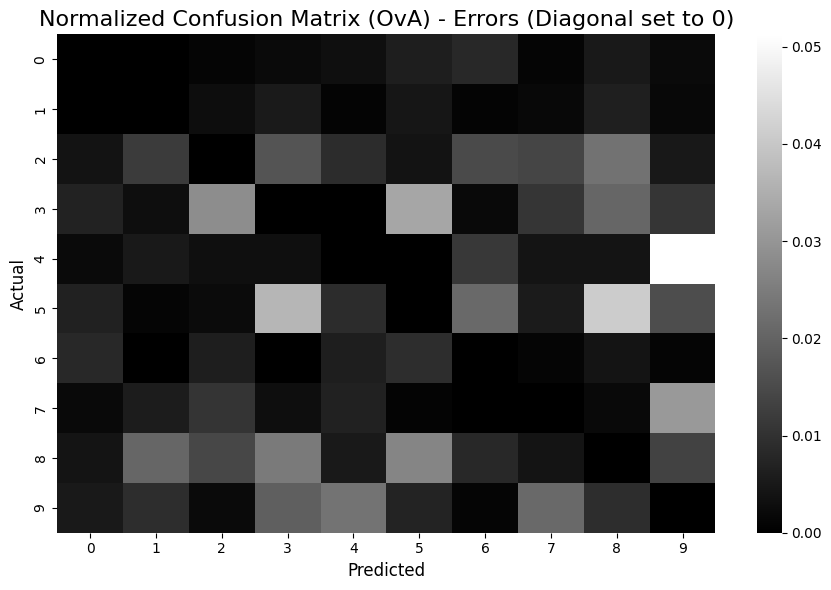

In [24]:
cm_ova_normalized = cm_ova.astype('float') / cm_ova.sum(axis=1)[:, np.newaxis]

np.fill_diagonal(cm_ova_normalized, 0)

# Plotting the confusion matrix with black and white color scheme
plt.figure(figsize=(9, 6))
sns.heatmap(cm_ova_normalized, fmt='.2f', cmap='gray', xticklabels=np.arange(10), yticklabels=np.arange(10))

# Title and labels
plt.title('Normalized Confusion Matrix (OvA) - Errors (Diagonal set to 0)', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

Misclassified samples where true label is 4 and predicted is 9 (OvO):


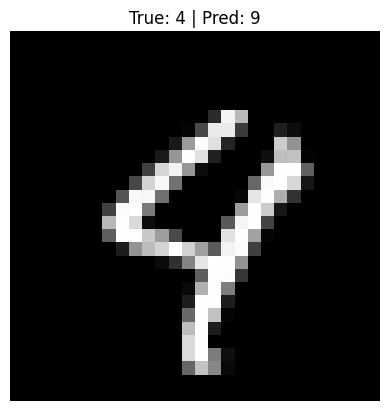

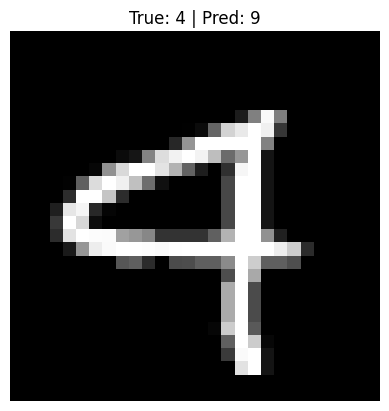

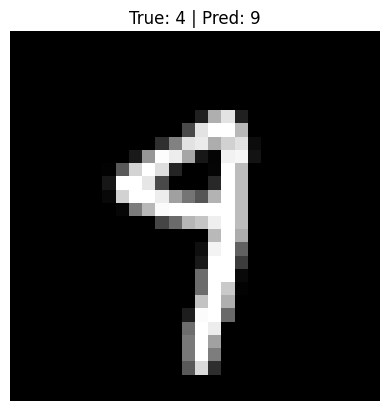

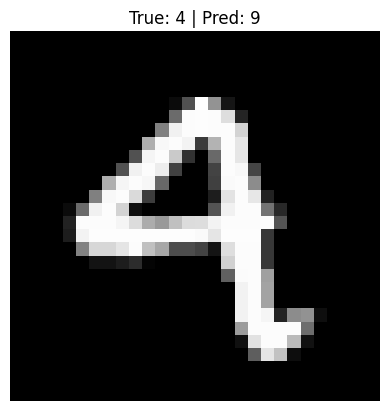

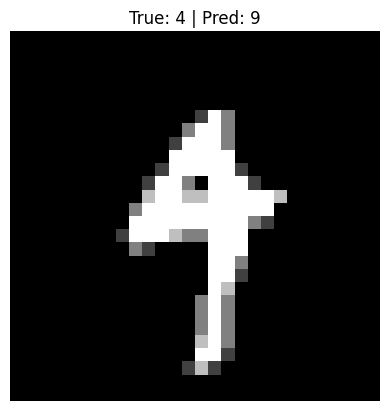

In [25]:
error_indices = np.where((y_test == 4) & (y_pred_ovo == 9))[0]

# Show a few misclassified samples
print(f"Misclassified samples where true label is 4 and predicted is 9 (OvO):")
for idx in error_indices[:5]:  # Display first 5 misclassified samples
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test.iloc[idx]} | Pred: {y_pred_ovo[idx]}")
    plt.axis('off')
    plt.show()

# Multilabel Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)

y_train_multilabel = np.c_[y_train_large, y_train_odd]

y_test_large = (y_test >= 7)
y_test_odd = (y_test.astype('int8') % 2 == 1)

y_test_multilabel = np.c_[y_test_large, y_test_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

y_pred_multilabel = knn_clf.predict(X_test)

print("Multilabel Classification Performance (KNeighborsClassifier):")
print(classification_report(y_test_multilabel, y_pred_multilabel))

Multilabel Classification Performance (KNeighborsClassifier):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3011
           1       0.98      0.99      0.98      5083

   micro avg       0.98      0.98      0.98      8094
   macro avg       0.98      0.98      0.98      8094
weighted avg       0.98      0.98      0.98      8094
 samples avg       0.60      0.60      0.60      8094



c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

# Multioutput Classification

In [27]:
# Add noise to the training data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

# Add noise to the test data
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# Set the clean images as the target
y_train_mod = X_train
y_test_mod = X_test

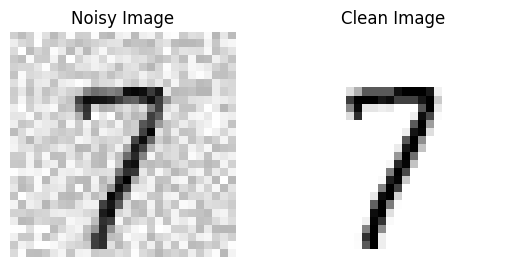

In [28]:
def plot_digit(image):
    plt.imshow(image.values.reshape(28, 28), cmap="binary")
    plt.axis("off")

# Display noisy image vs. original image for the first test sample
plt.subplot(121)
plot_digit(X_test_mod.iloc[0])  # Display noisy image
plt.title("Noisy Image")
plt.subplot(122)
plot_digit(y_test_mod.iloc[0])  # Display original image
plt.title("Clean Image")
plt.show()

c:\folder\machine-learning-with-qafzah\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


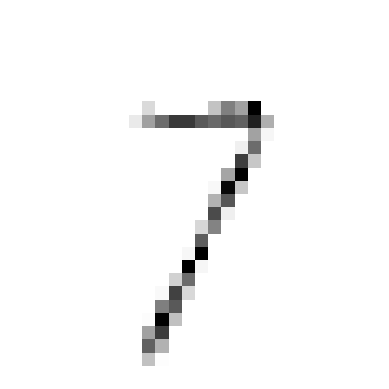

In [29]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([y_test_mod.iloc[0]])
plt.imshow(clean_digit.reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()